Project Goals:

We will train a Linear Regression model using advertising expenditure and sales data to identify which advertising channels provide the highest return on investment (ROI). Additionally, we aim to determine which channels exhibit the most predictable relationship between money spent and sales generated (forecasting reliability).

_______________________________________________________________________________________________________________________________________________________________________

Installs & Imports

In [144]:
!pip install scikit-learn

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

_______________________________________________________________________________________________________________________________________________________________________

In [146]:
df = pd.read_csv('advertising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [147]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No null values, and data is already in the format we need, so no real preprocessing we need to do aside from converting to a pandas dataframe!

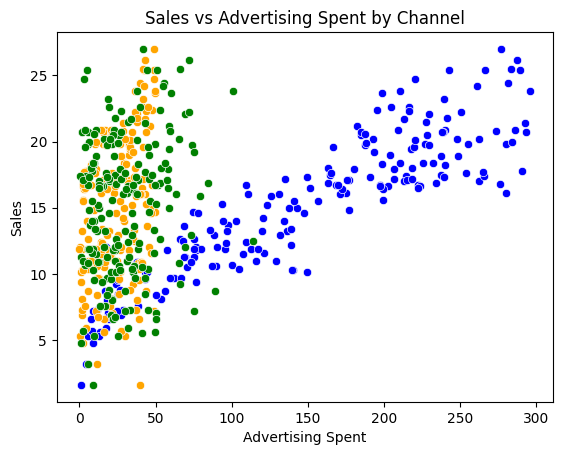

In [148]:
sns.scatterplot(data=df, x='TV', y='Sales', color='blue')
sns.scatterplot(data=df, x='Radio', y='Sales', color='orange')
sns.scatterplot(data=df, x='Newspaper', y='Sales', color='green')
plt.xlabel('Advertising Spent')
plt.ylabel('Sales')
plt.title('Sales vs Advertising Spent by Channel')
plt.show()

Our data values on a scatterplot. We can quickly see that TV advertising has a more clear positive correlation with sales comapred to Radio and Newspaper

_______________________________________________________________________________________________________________________________________________________________________

Creation of test split and Linear Regression model

In [149]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']                        # Target

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [151]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


_______________________________________________________________________________________________________________________________________________________________________

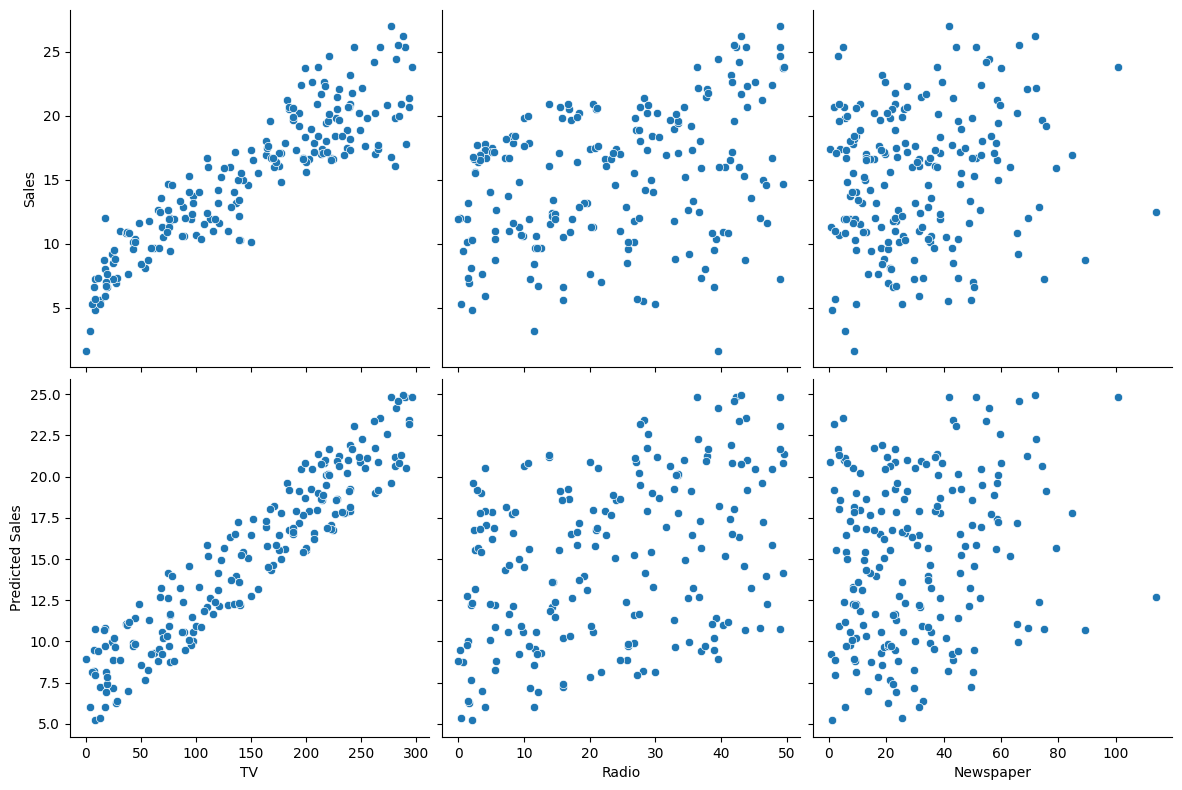

In [152]:
df['Predicted Sales'] = model.predict(df[['TV', 'Radio', 'Newspaper']])
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales', 'Predicted Sales'], height=4, aspect=1)
plt.show()

Scatterplots showing the relationship between advertising spend by channel and resulting sales

The top row displays observed data, and the bottom row shows predictions generated by the linear regression model

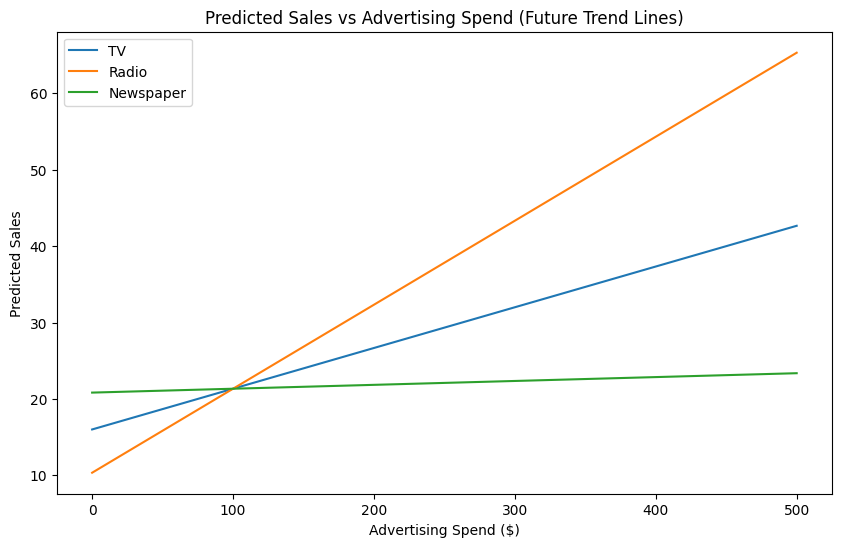

In [153]:
plt.figure(figsize=(10,6))
for feature in ['TV', 'Radio', 'Newspaper']:
    # Create future values for each advertising channel
    future_df = pd.DataFrame({
        'TV': [100]*50,
        'Radio': [100]*50,
        'Newspaper': [100]*50
    })
    # Vary only one feature at a time (0–500)
    future_df[feature] = np.linspace(0, 500, 50)
    
    # Predict directly without scaling
    preds = model.predict(future_df)
    plt.plot(future_df[feature], preds, label=feature)

plt.title('Predicted Sales vs Advertising Spend (Future Trend Lines)')
plt.xlabel('Advertising Spend ($)')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

According to our model, Radio has the strongest positive correlation between money spent on advertising and sales, followed by TV, and then Newspaper

In [154]:

for col in ['TV', 'Radio', 'Newspaper']:
    X_single = df[[col]]
    y = df['Sales']

    # Train a model using only this feature
    model_single = LinearRegression()
    model_single.fit(X_single, y)

    # Predict and evaluate
    y_pred_single = model_single.predict(X_single)
    r2 = r2_score(y, y_pred_single)
    mse = mean_squared_error(y, y_pred_single)

    print(f"{col}: R² = {r2:.3f}, MSE = {mse:.3f}")

TV: R² = 0.812, MSE = 5.218
Radio: R² = 0.122, MSE = 24.384
Newspaper: R² = 0.025, MSE = 27.087


MSE: The lower the number, the less variance between model predictions and true values (very far off calculations are weighed more heavily)

R2: Accuracy of the variance our model predicts. The closer to "1" the closer to 100% accurate. R2 of 1 means that the spread in the data is perfectly predicted

Notably, the statistics for TV show that its linear relationship with sales is much clearer and more reliable than those for Radio and Newspaper

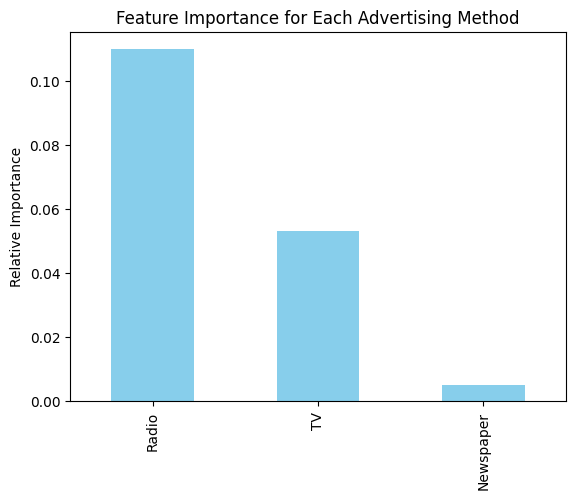

In [155]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['TV','Radio','Newspaper']])
y = df['Sales']

importance = pd.Series(model.coef_, index=['TV','Radio','Newspaper'])
importance = importance.abs().sort_values(ascending=False)

importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance for Each Advertising Method')
plt.ylabel('Relative Importance')
plt.show()

The feature importance graph shows that Radio advertising has the strongest influence on the model's sales predictions. This means that our model assigns Radio advertising spending as the strongest predictor for sales.

_______________________________________________________________________________________________________________________________________________________________________

Conclusion:

In terms of positive correlation between money invested and sales, advertising through Radio provides the highest ROI. However, model R2 score and MSE indicates that the model's predictions for TV advertising ROI are much more reliable than that of Radio and Newspaper.

This suggests that while Radio's ROI may be higher on average, the actual ROI seen is subject to quite a bit of variance and unpredictability. For this reason, TV advertising may be more practical for it's reliability and comparatively robust ROI.

Overall:
- Radio: Unpredictable, highest ROI on average, viable but unreliable
- TV: Predictable, 2nd highest ROI, most practical option but not as high a "ceiling" as Radio advertising
- Newspaper: Unpredictable, lowest ROI, least practical of the 3 advertising methods




Limitations & Considerations:

The biggest limitation of this project is its low R2 score and MSE for Radio and Newspaper advertising. This is because of the high variance in the dataset for Radio and Newspaper ROI, so overfitting for TV data is probably not the issue here.

Overall, because of the high variance for Radio and Newspaper, linear regression may not be the best ROI forecasting approach for these 2 advertising channels.